Exercises

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

1.As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

2.Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import env
import wrangle
import explore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
#disable auto scroll

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
#pull my data
df = wrangle.wrangle_zillow()

In [5]:
#look at head
df.head()

,bedroom,bathroom,area,tax_value,year_built,tax_amount,fips
7,3,2.0,2077,646760,1926,7924.68,6037
18,3,1.0,1244,169471,1950,2532.88,6037
19,3,2.0,1300,233266,1950,3110.99,6037
20,3,2.0,1222,290492,1951,3870.25,6037
40,2,1.0,725,37548,1953,576.47,6037


In [6]:
#split data
train, validate, test = wrangle.split_data(df)
train.shape,validate.shape,test.shape

((1023397, 7), (438600, 7), (365500, 7))

3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair

In [29]:
#vizualise pairplot
def plot_variable_pairs(df):
    sns.pairplot(data=df.sample(10000), kind='reg', diag_kind='kde', corner = True, plot_kws={'line_kws':{'color':'red'}})

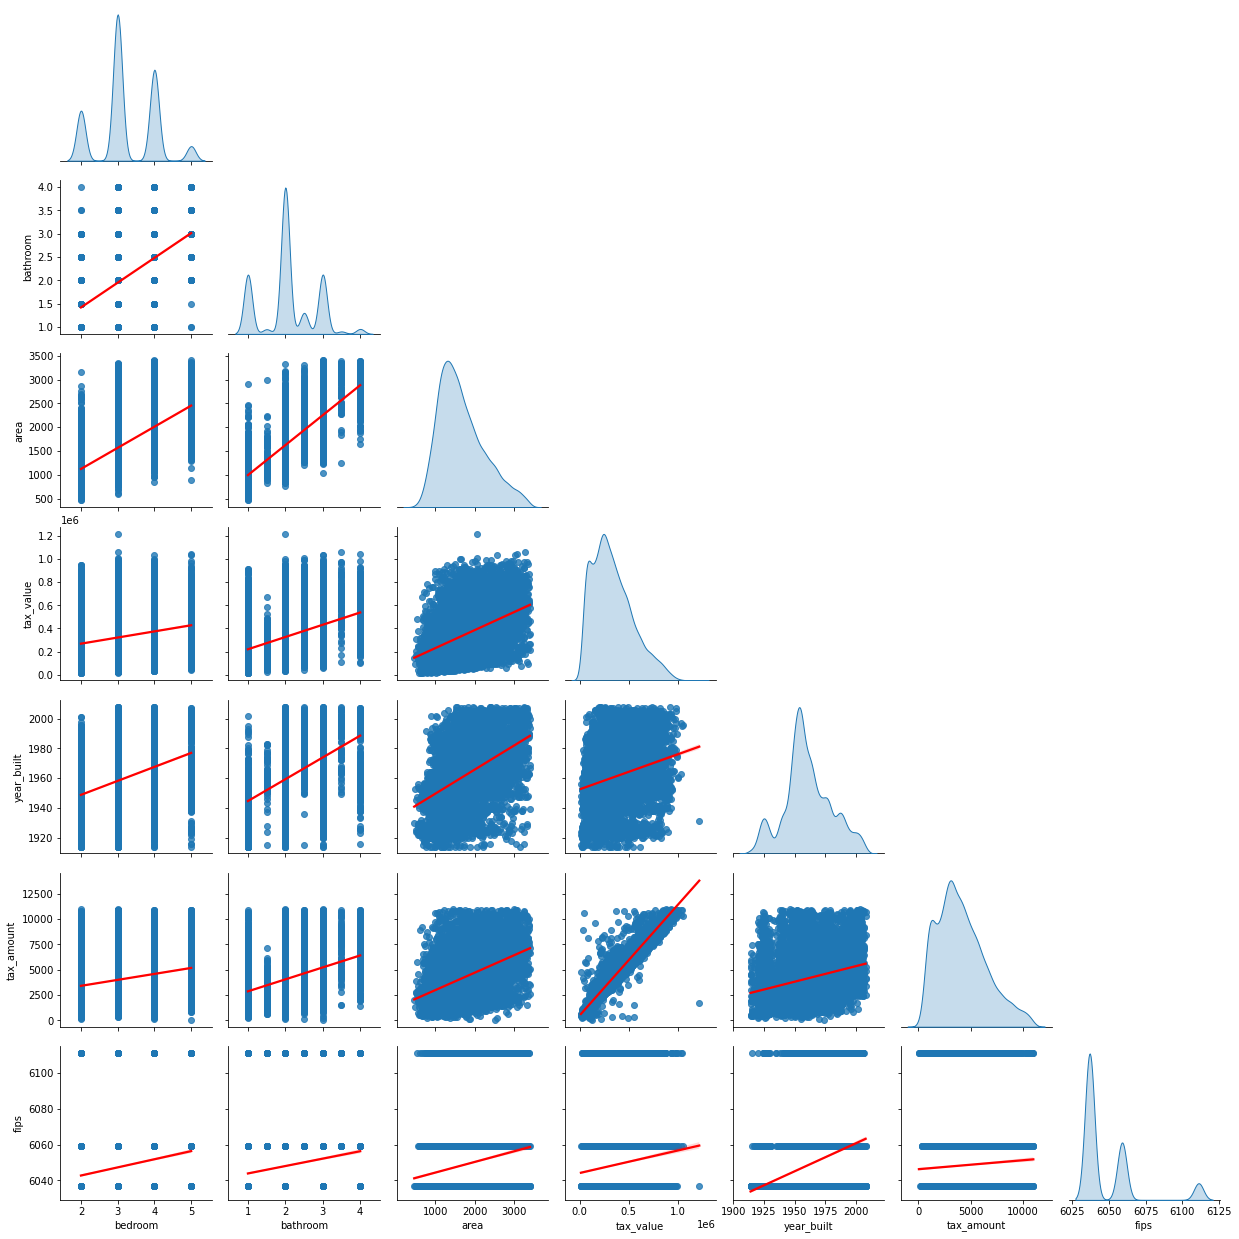

In [37]:
#plot using function
plot_variable_pairs(train)

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [31]:
#categorise columns 
cat_var = ["bedroom","bathroom","fips","year_built"]
con_var = ["tax_amount","tax_value"]

In [14]:
#define funtion which holds 3 graphs
def plot_categorical_and_continous(cat_var,con_var):
    plt.figure(figsize= (20,10))
    plt.subplot(131)
    sns.boxplot(x = cat_var, y = con_var, data = train.sample(10000))
    plt.subplot(132)
    sns.swarmplot(x = cat_var, y = con_var, data = train.sample(10000))
    plt.subplot(133)
    sns.barplot(x = cat_var, y = con_var, data = train.sample(10000))
    plt.figure()

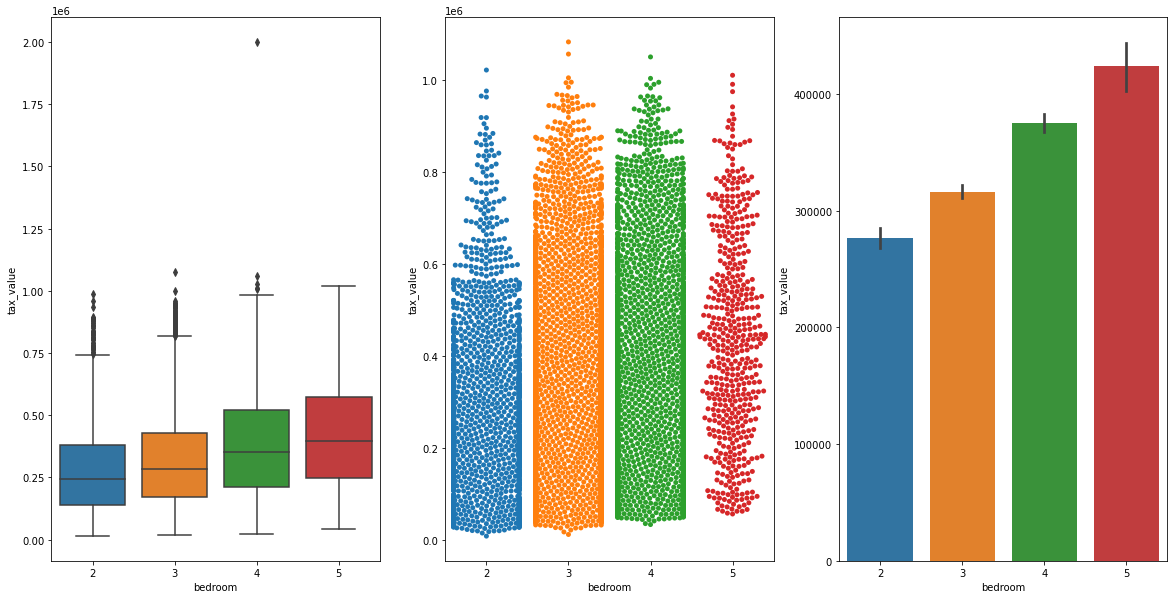

<Figure size 432x288 with 0 Axes>

In [15]:
#plot graph
plot_categorical_and_continous("bedroom","tax_value")

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file

6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook

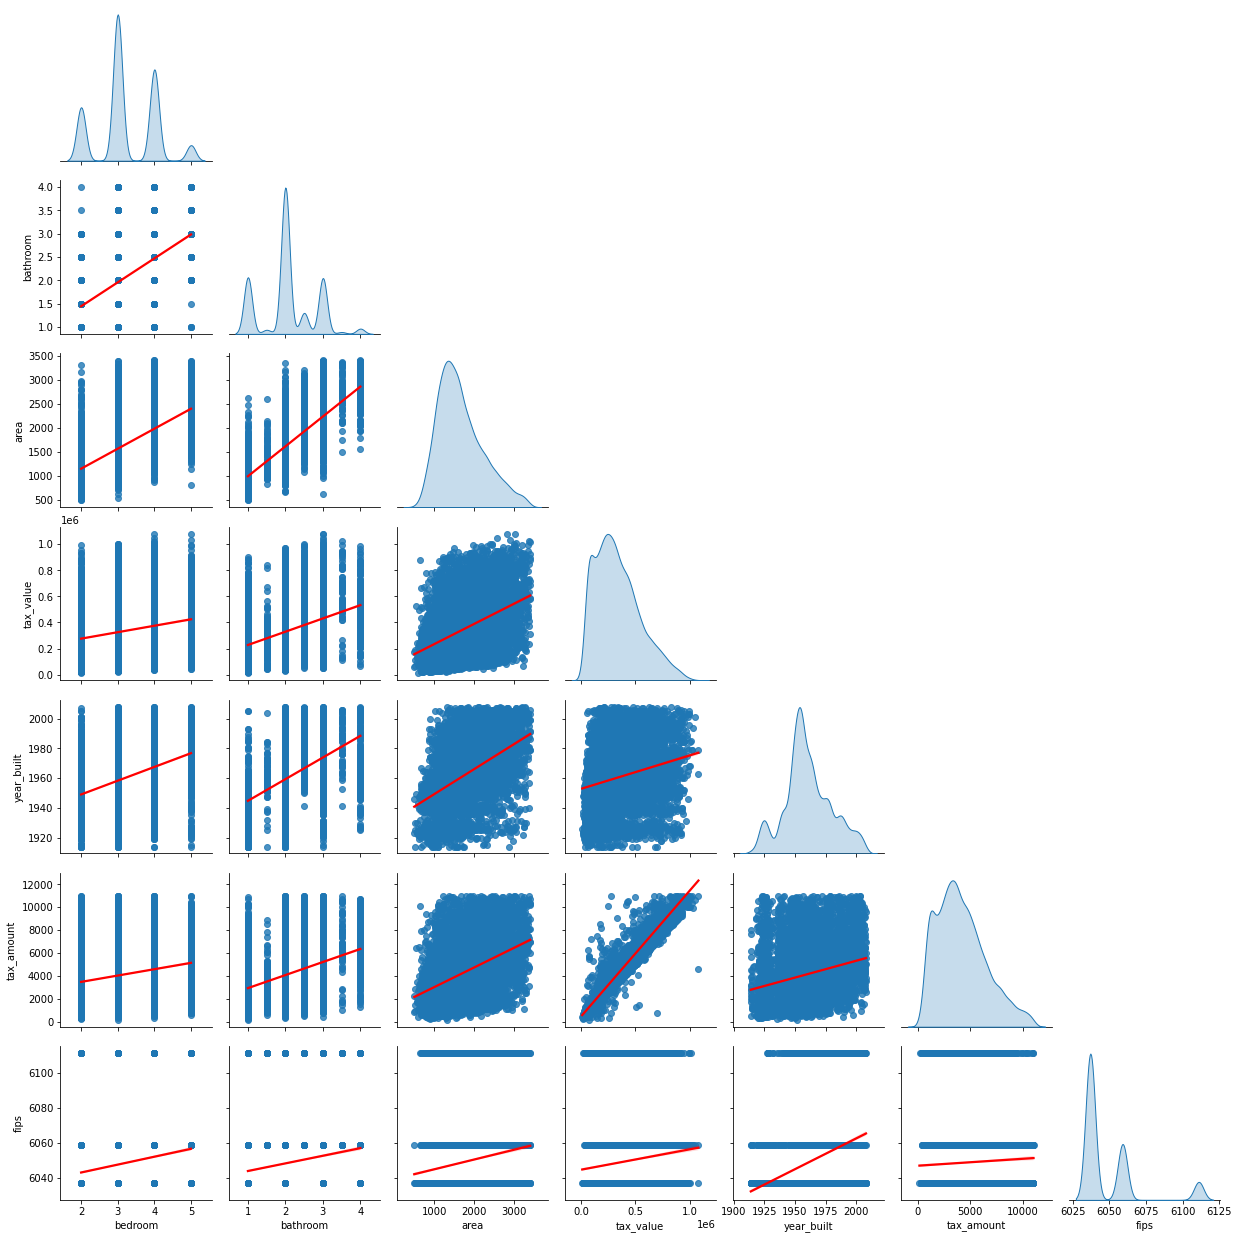

In [7]:
#use explore.py functions to plot
explore.plot_variable_pairs(train)

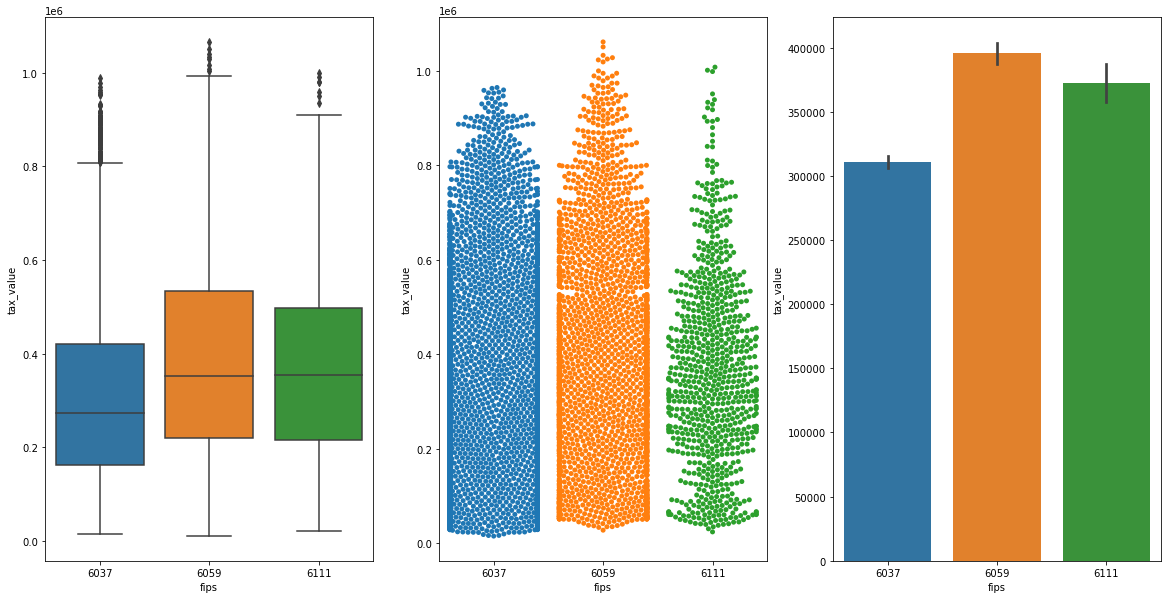

<Figure size 432x288 with 0 Axes>

In [7]:
#use explore.py functions to plot
explore.plot_categorical_and_continous("fips","tax_value",train)

7. Come up with some initial hypotheses based on your goal of predicting property value.

In [8]:
#there is correlation in area with tax amount, tax value and year built
#tax amount and tax value are strongly correlated

8. Visualize all combinations of variables in some way.



In [17]:
#correlation table
train_corr = train.corr(method='spearman')
train_corr

,bedroom,bathroom,area,tax_value,year_built,tax_amount,fips
bedroom,1.000000,0.578297,0.604670,0.197490,0.413405,0.196920,0.189181
bathroom,0.578297,1.000000,0.785195,0.354436,0.563477,0.350658,0.199327
area,0.604670,0.785195,1.000000,0.397880,0.498288,0.391414,0.200578
tax_value,0.197490,0.354436,0.397880,1.000000,0.236107,0.973464,0.165045
year_built,0.413405,0.563477,0.498288,0.236107,1.000000,0.228804,0.413997
tax_amount,0.196920,0.350658,0.391414,0.973464,0.228804,1.000000,0.086983
fips,0.189181,0.199327,0.200578,0.165045,0.413997,0.086983,1.000000


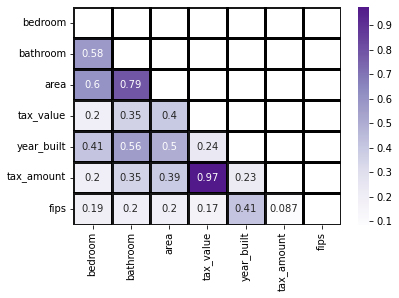

In [18]:
# pass my correlation matrix to Seaborn's heatmap with more customization! 
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}

sns.heatmap(train_corr, cmap='Purples', annot=True, 
            mask=np.triu(train_corr), **kwargs)
plt.show()